In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

'data/tst.csv'

## get data

In [6]:
def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)# 1create empty df for designated date
    
    if 'SPY' not in symbols:  # 2add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp=pd.read_csv(symbol_to_path(symbol, base_dir="data"), # 3read in data from the symbol
                           index_col='Date',
                           parse_dates=True,
                           usecols=['Date','Adj Close'],
                           na_values=['nan'])
        df_temp=df_temp.rename(columns={'Adj Close':symbol})       # 4rename the adjust close column to the symbol name
        df=df.join(df_temp) 
        if symbol =='SPY':#5drop rows where SPY is na/ensure SPY is used as a reference-we don't have na values in the spy column
            df=df.dropna(subset=['SPY'])
    

    return df

## normalize data
use the first row of the dataframe

In [21]:
def normalize_data(df):
    return df/df.iloc[0,:]

## plot in two ways

In [16]:
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # TODO: Your code here
    # Note: DO NOT modify anything else!
    plot_data(df.loc[start_index:end_index,columns],title='Selected data')



def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

## function test

In [17]:
def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31')
    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)
    #normalize data
    df=normalize_data(df)
    # Slice and plot
    plot_selected(df, ['SPY', 'GOOG','GLD'], '2010-03-01', '2010-04-01')
    print df


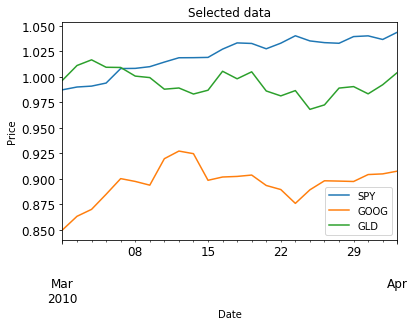

                 SPY      GOOG  IBM       GLD
2010-01-04  1.000000  1.000000  NaN  1.000000
2010-01-05  1.002647  0.995596  NaN  0.999089
2010-01-06  1.003353  0.970499  NaN  1.015574
2010-01-07  1.007588  0.947906  NaN  1.009290
2010-01-08  1.010941  0.960543  NaN  1.014299
2010-01-11  1.012353  0.959091  NaN  1.027778
2010-01-12  1.002912  0.942130  NaN  1.006284
2010-01-13  1.011383  0.936721  NaN  1.015847
2010-01-14  1.014118  0.941125  NaN  1.020310
2010-01-15  1.002735  0.925409  NaN  1.009654
2010-01-19  1.015265  0.937567  NaN  1.015665
2010-01-20  1.004941  0.926063  NaN  0.992168
2010-01-21  0.985617  0.930164  NaN  0.977869
2010-01-22  0.963646  0.877559  NaN  0.976047
2010-01-25  0.968587  0.861588  NaN  0.978871
2010-01-26  0.964528  0.865449  NaN  0.979599
2010-01-27  0.969117  0.864938  NaN  0.970219
2010-01-28  0.957999  0.852477  NaN  0.969763
2010-01-29  0.947587  0.845536  NaN  0.965027
2010-02-01  0.962322  0.850451  NaN  0.986794
2010-02-02  0.973970  0.847419  Na

In [22]:
 test_run()